
# Trabajo final de Bases de Datos Biológicas
### Maestría en Bioinformática y Biología de Sistemas
### Abigail Stricker
Nota: Los ejercicios donde se utilizó programación usé RStudio para escribir los scripts. Tuve problemas con el colab y la importación de librerías y paquetes.

Este trabajo de la materia Bases de Datos Biológicas consiste en cinco ejercicios de dificultad variada. Los astericos al lado del título del ejercicio dan una idea de la dificultad esperada del ejercicio.

La entrega debe ser un archivo .ipynb que contenga las respuestas, con el código de R necesario cuando corresponda.
La resolución de los ejercicios no debiera requerir conocimientos de programación en R más allá de los ejemplos que se vieron en la clase. De todas formas, pueden consultar acercar del uso del lenguage de programacion R si es necesario.
Recuerden que pueden hacer una copia del *notebook* a su unidad de google drive y pueden descargar una copia desde la barra de menú>Archivo>Descargar.

Fecha límite de entrega 1 de agosto de 2021, la entrega debe hacerse por el Classroom de la materia.


## **Ejercicio 1**




Uniprot contiene varias bases de datos: Swiss-Prot, TrEMBL, Uniparc, Uniref y Proteomes.

Describa exactamente que tipo de información contiene cada una.

Cada una de estas bases de datos se especializan en el tipo de datos y la curación que le realizan.


*   **Swiss-Prot:** contiene las secuencias proteicas surgidas de datos experimentales, basadas en evidencia. Tiene un alto nivel de anotación manual, producida a través de bibliografía y análisis de secuencia. Está fuermente controlada por curadores.
*   **TrEMBL:** Tiene secuencias traducidas a partir de regiones codificantes de secuencias nucleótidicas de bases de datos como EMBL y GenBank. Sus anotaciones son automáticas, sin el control de curadores.
*   **Uniparc:** Cada secuencia parte de esta base es única y no tiene redundancia. Se le da una UPI (stable and unique identifier) que nunca es removido, cambiado o reasignado. Uniparc sólo guarda la secuencia, sin anotaciones. Información sobre la proteína puede encontrarse en otras bases de datos, donde puede utilizarse el UPI para llegar rápidamente a la secuencia en cuestión. 
*   **Uniref:** Agrupa Uniprot Knowledgebase y algunos registros seleccionados de Uniparc. Uniref100 contiene las secuencias idénticas entre sí en una entrada única de Uniref. Para generar cada cluster único se entrega una secuencia *seed* que la base de datos usa para reclutar otras secuencias. 
Al realizar una búsqueda también están disponibles los clusters generados a partir de Uniref90 y Uniref50. Estas dos se producen a partir de Uniref100; la primera incluye secuencias que contienen 90% de identidad mientras que en la segunda se encuentran las que tienen 50% de identidad. Estos porcentajes se miden en comparación con la secuencia más larga del cluster.
*   **Proteomes:** son proteomas de genomas completamente secuenciados. Pueden contener secuencias traducidas a partir de plásmidos y genomas de organulos. Puede ocurrir que haya secuencias que no puedan mapearse en el genoma de referencia por errores de secuenciamiento; éstas solo se agregan al proteoma luego de revisiones manuales utilzando evidencia previa.
Algunos proteomas se eligen como referencia, generalmente para animales modelo y/o de interés biomédico.





## **Ejercicio 2**

Navegue la base de datos 'taxonomy' para averiguar los nombres de cuatro especies de organismos de estas categorías.

- Bacterias Firmicutes
- Bacterias Gammaproteobacteria 
- Hongos
- Plantas
- Animales

Luego: 

- Busque en la base de datos 'proteín' de NCBI las secuencias de la enzima glucolítica phosphofructokinase de los organismos elegidos. Si no existiera secuencias para alguno de los organismos que eligió, seleccione otro. Además, no se deben recuperar las secuencias que en el título digan 'partial'.
- Construya un alineamiento múltiple de estas secuencias, con cualquier herramienta que usted quiera. 


Se hicieron búsquedas en NCBI usando "phosphofructokinase[protein] AND organismo[organism] NOT partial[Title]" utilizando los organismos:

**Animales:** Homo sapiens, Panthera leo, Caenorhabditis elegans, Danio rerio

**Plantas:** Setaria viridis, Arabidopsis thaliana, Selaginella moellendorffii, Medicago truncatula

**Gammaproteobacterias:** Pectobacterium carotovorum, Pectobacterium atrosepticum, Xylella fastidiosa, Pantoea ananatis 

**Hongos:** Aspergillus nidulans, Cryptococcus neoformans, Schizosaccharomyces pombe, Ustilago maydis 

**Firmicutes:** Staphylococcus aureus, Enterococcus faecium, Clostridioides difficile, Listeria monocytogenes

Se bajaron las secuencias proteicas y se armó manualmente un archivo FASTA. Las secuencias están ordenadas siguiendo el orden de la lista de especies más arriba. Se alinearon por clustal W en MEGA X

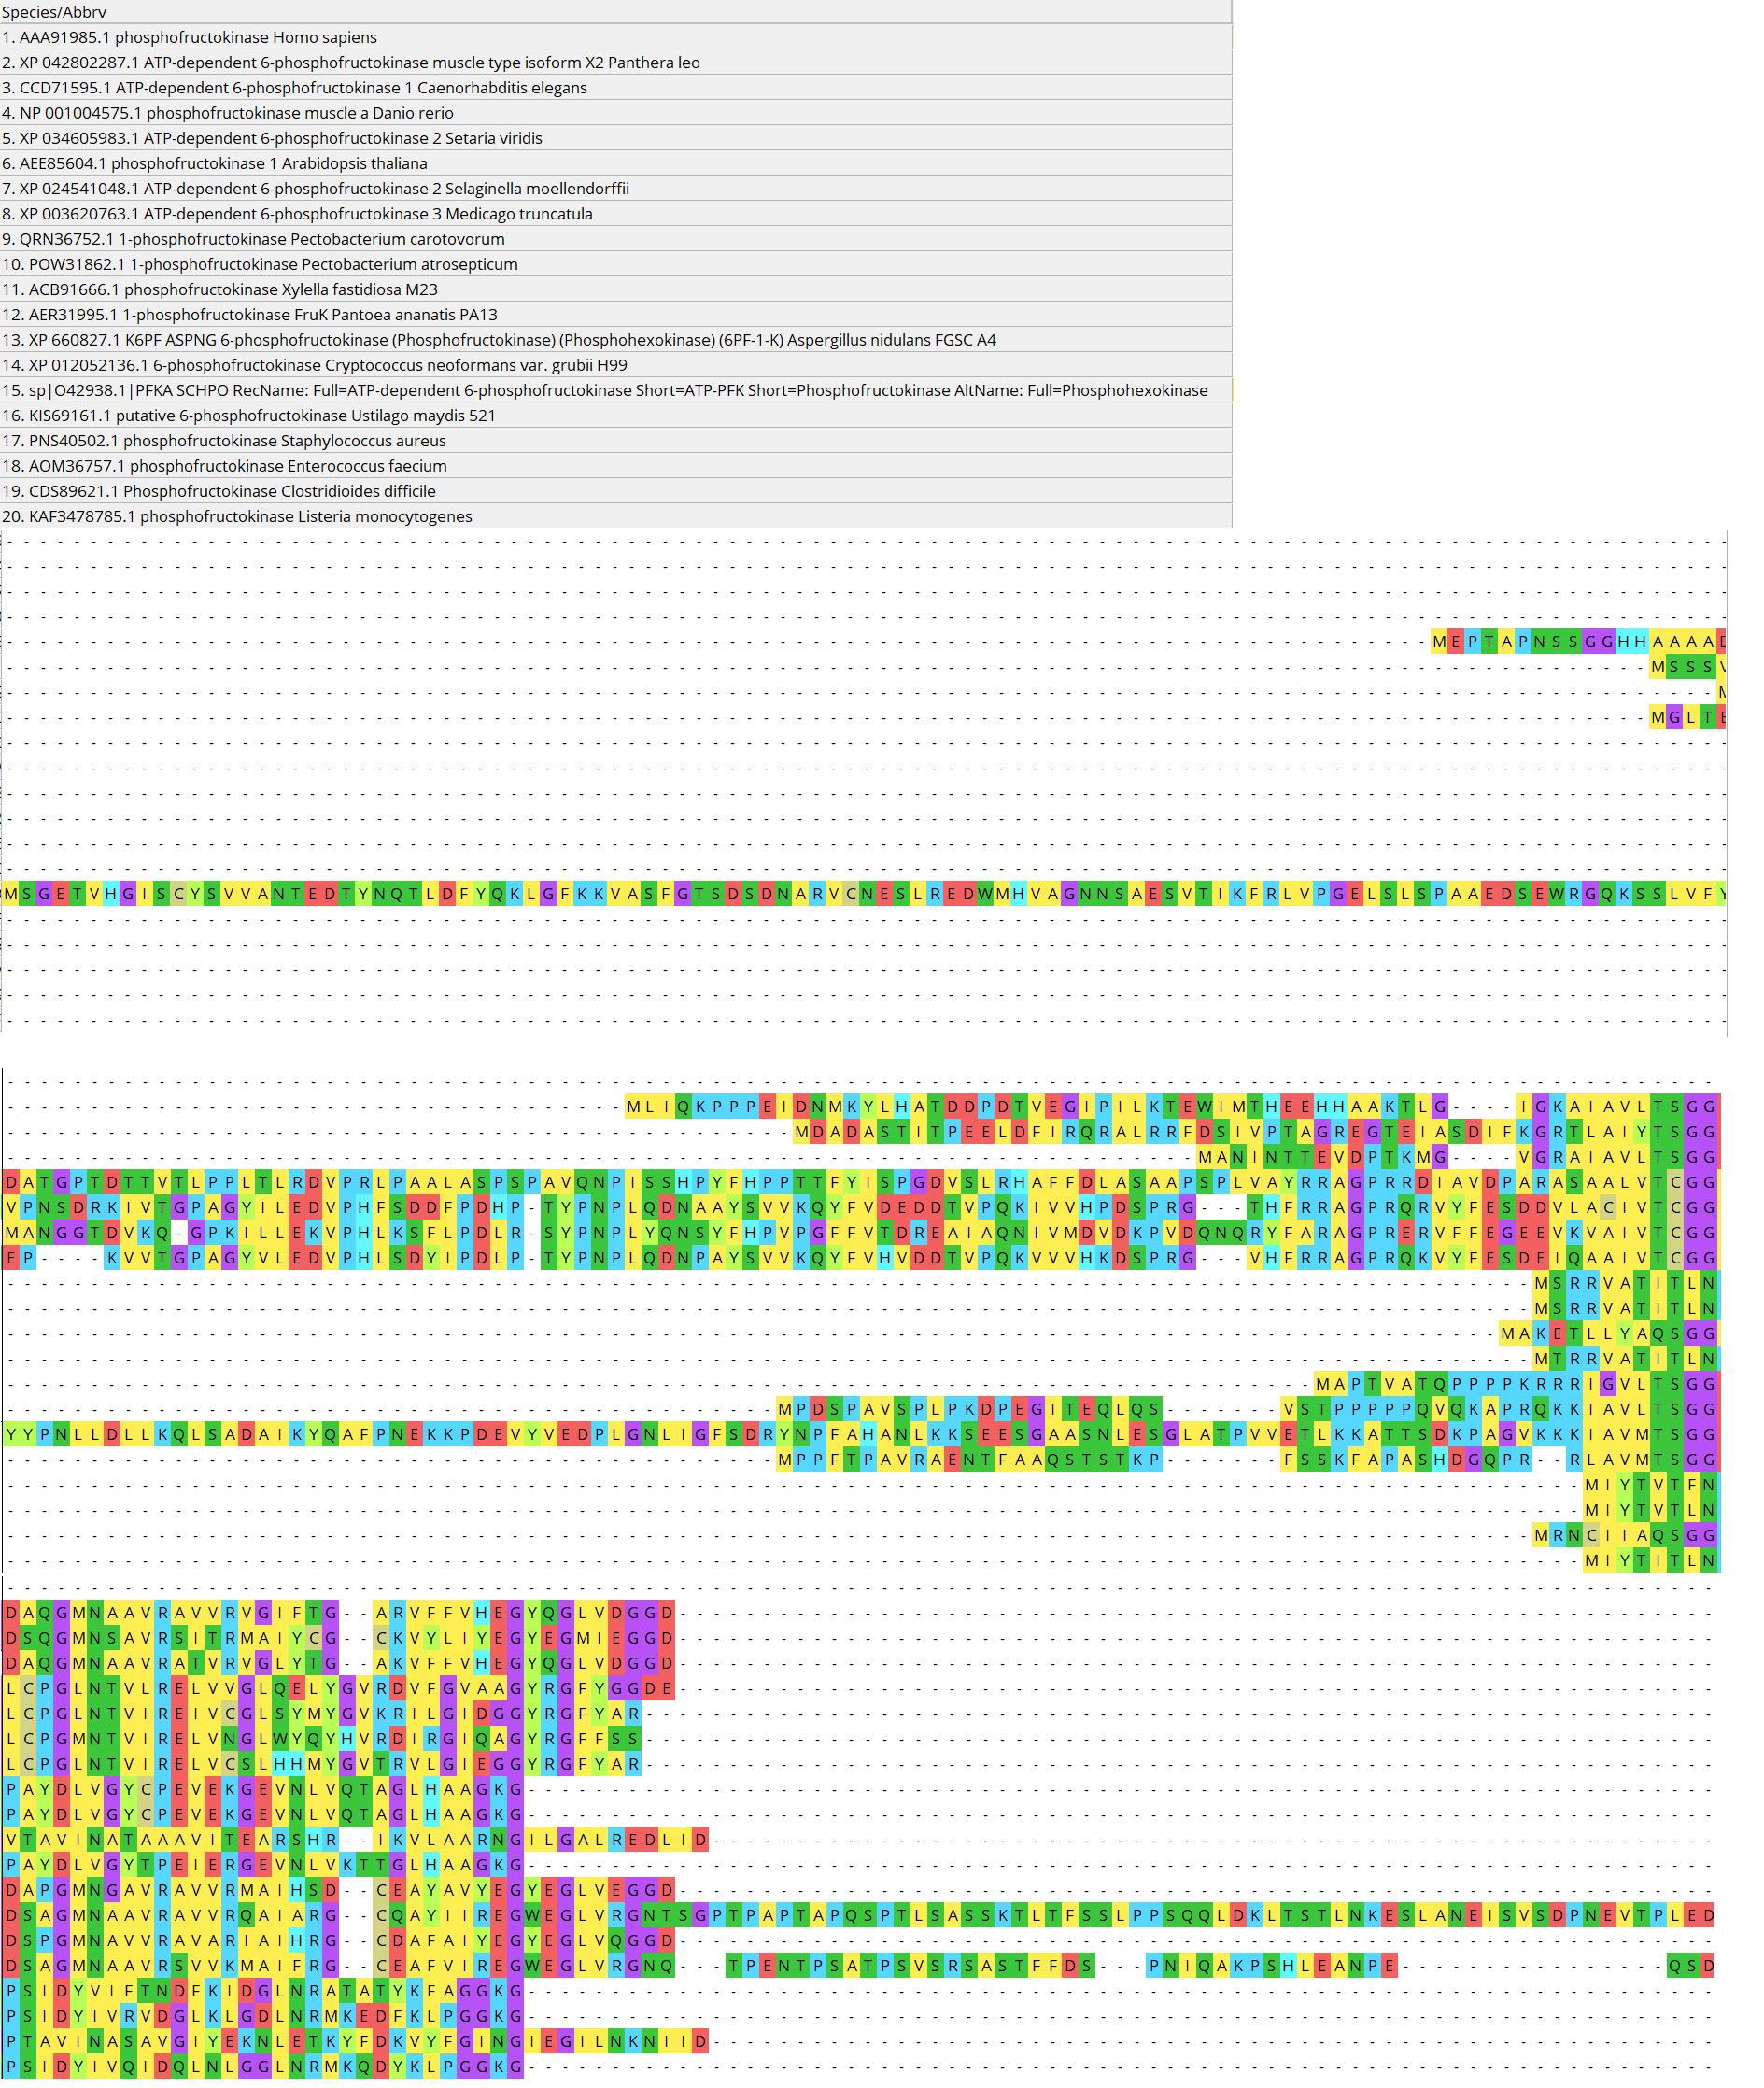

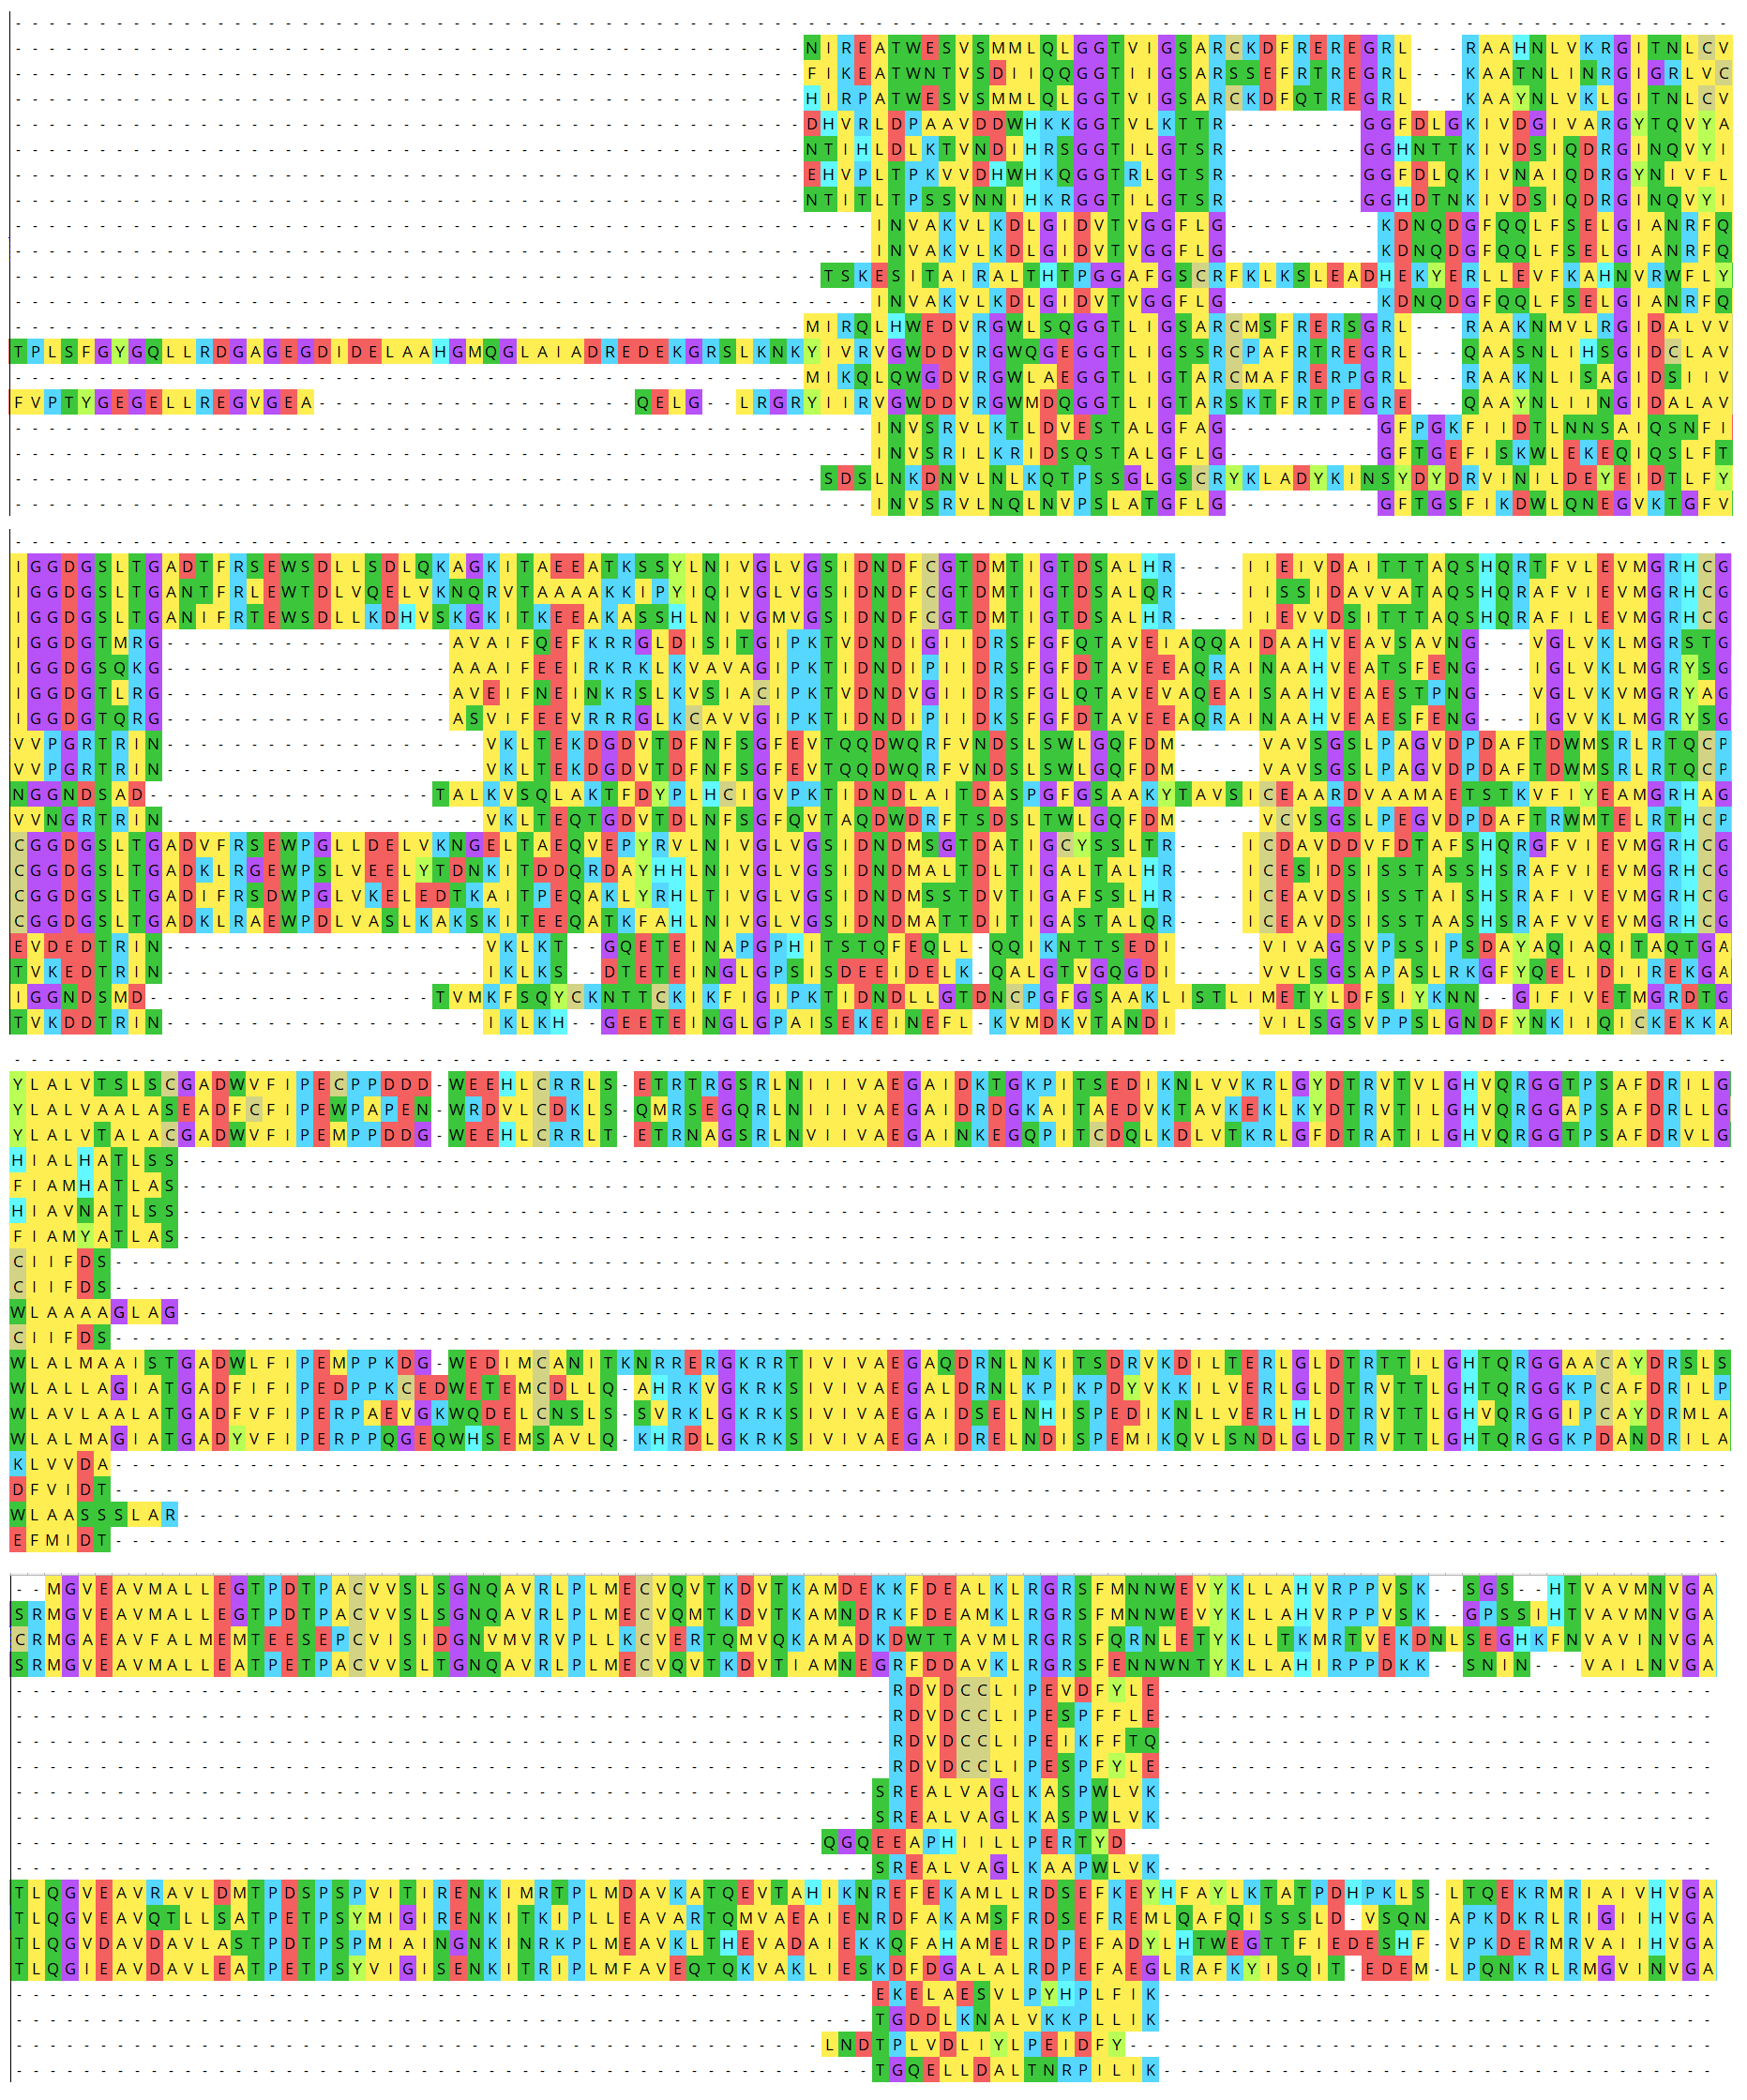

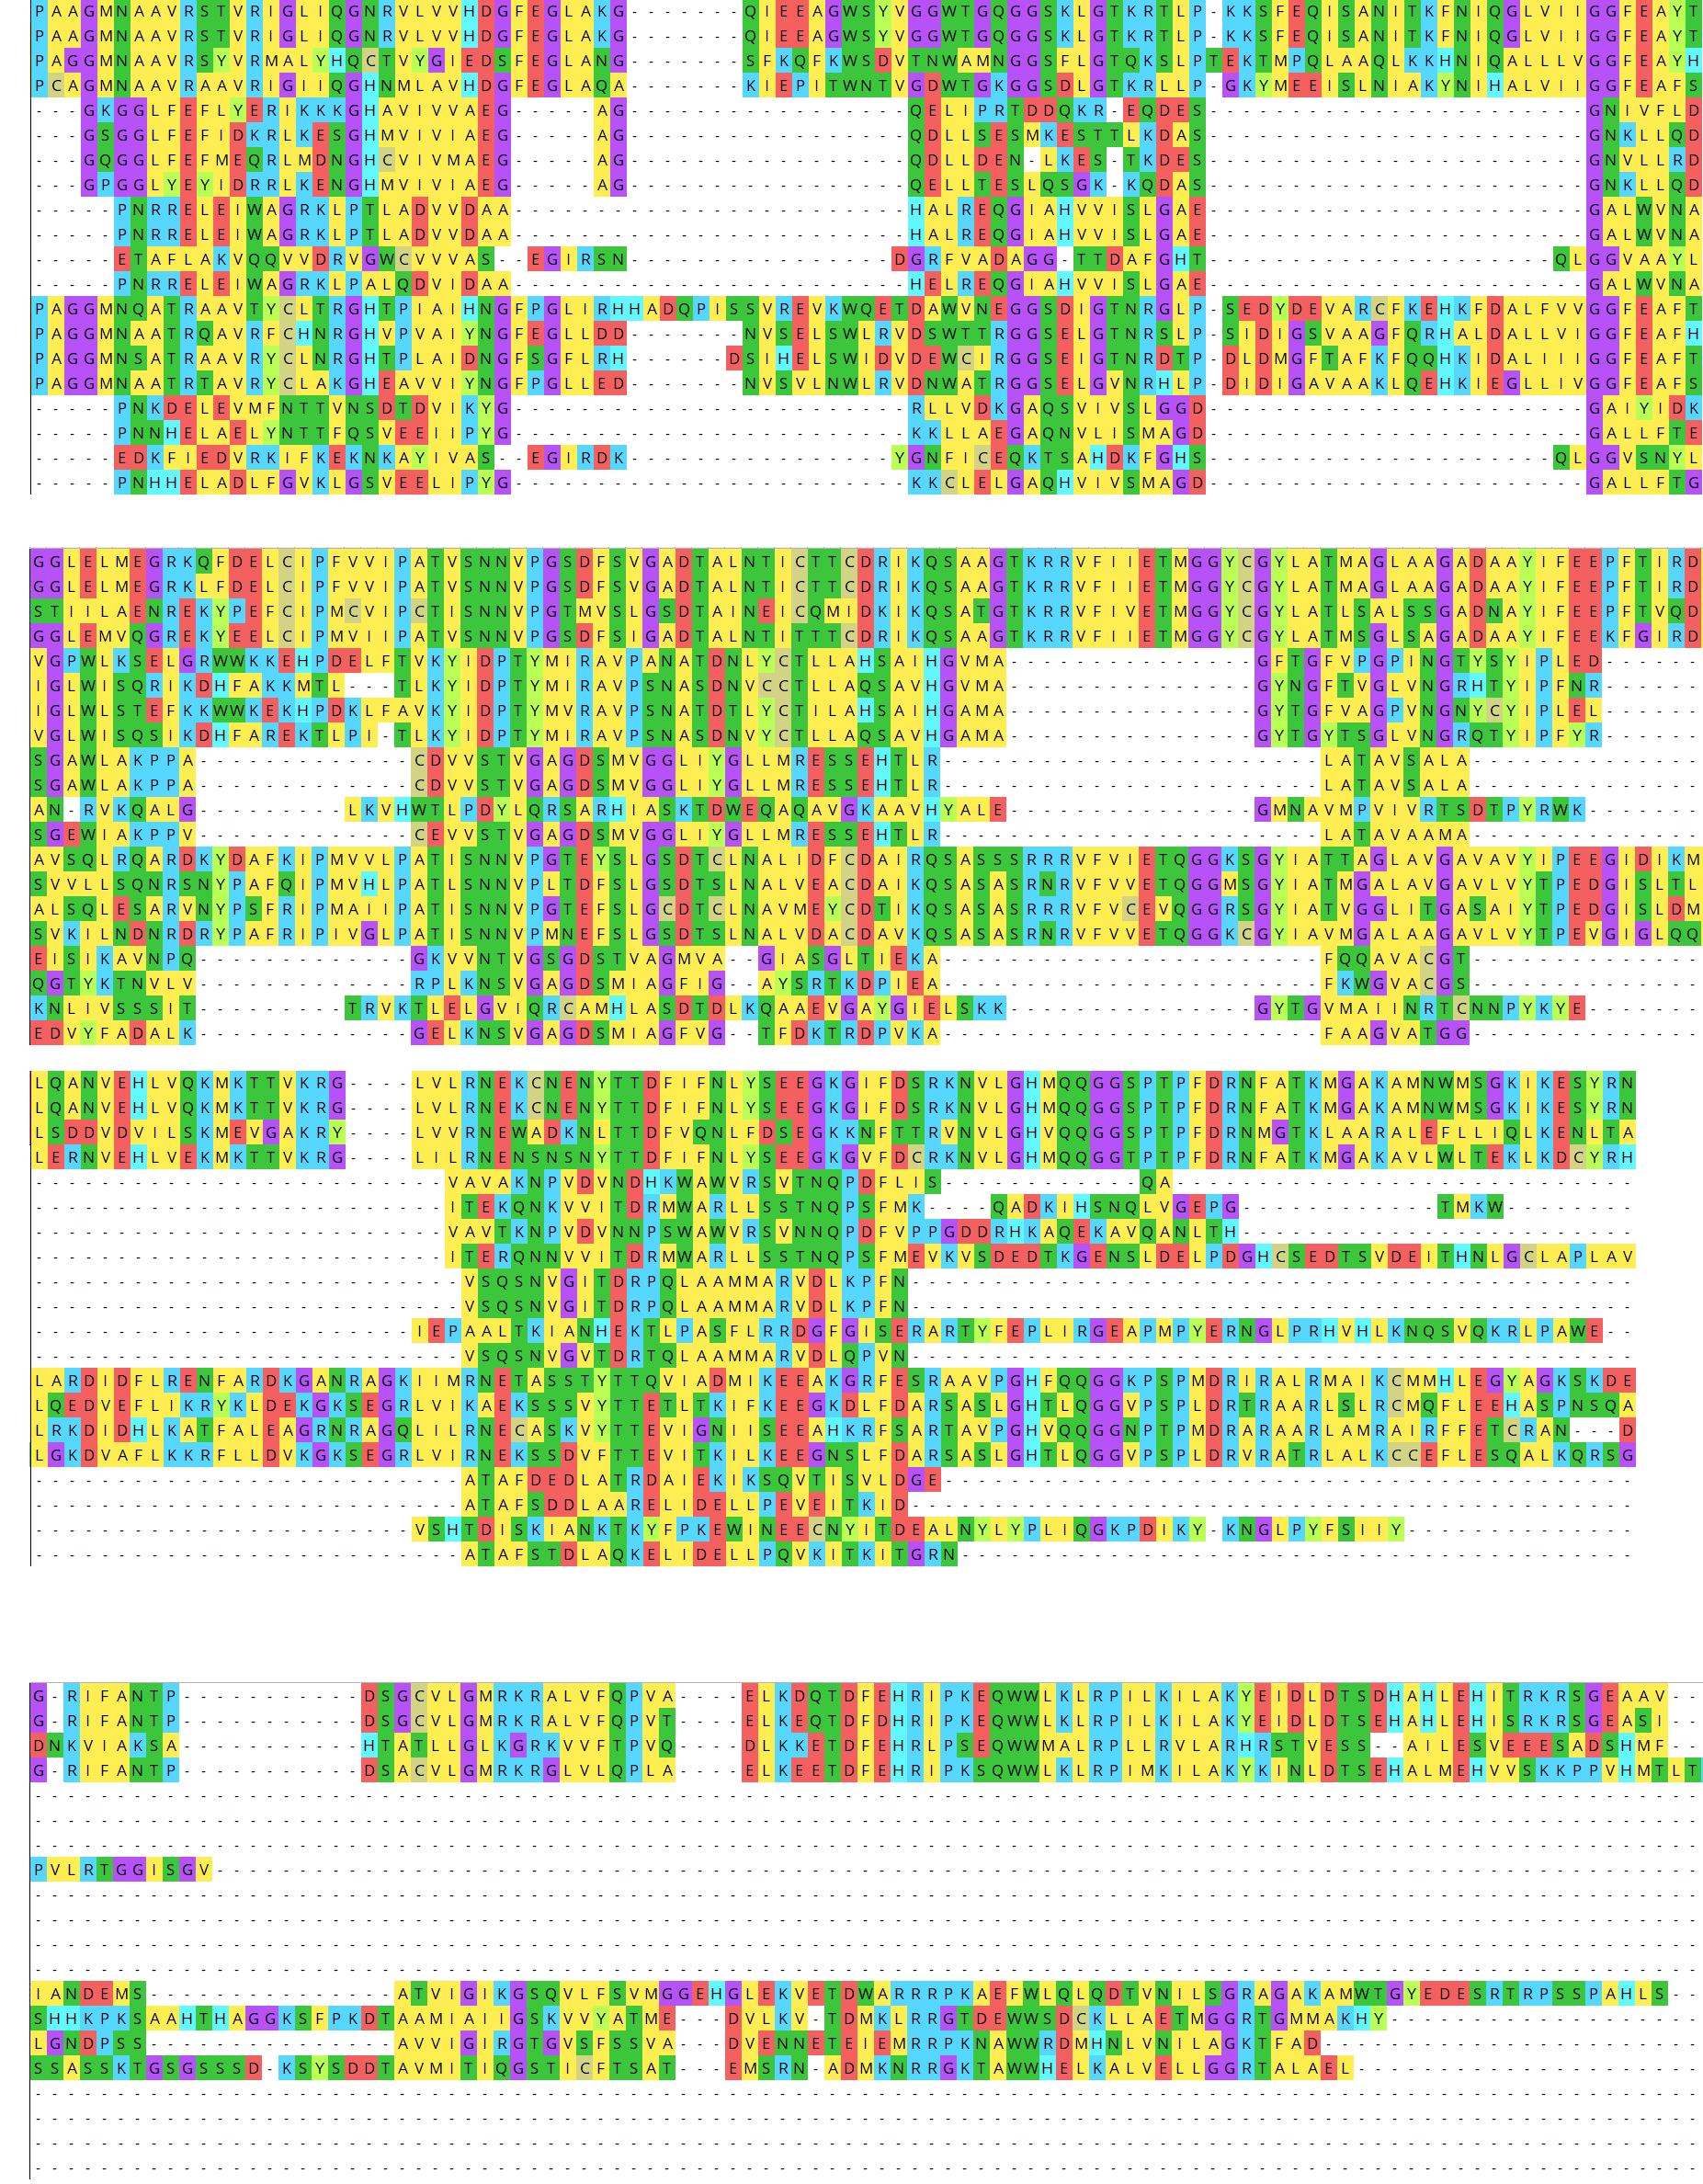

## **Ejercicio 3**

La proteína p53 es un supresor de tumor. Es una proteína desordenada y participa en muchas interacciones con otras proteínas. Está codificada por el gen TP53.

- Recuperar de la base de datos pubmed 10 abstracts de artículos que tengen en el título o en el abstract el nombre TP53.
- ¿Cuales de esos artículos corresponden realmente a la proteína p53?

In [1]:
install.packages("rentrez")
library(rentrez)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘XML’




In [2]:
mi_db <- "pubmed"
mi_term <- "p53 protein[Title] AND [abstract]"
max_artic <-10
mi_term <- "TP53[Title] AND [abstract]"
results<- entrez_search(db=mi_db, term=mi_term, retmax=max_artic)
results$ids
names(results)
records <- entrez_fetch(db='pubmed', id=results$ids, rettype='txt')
write.table(records, "punto3.txt")
write.table(records)
#en Rstudio me funcionó bien

[1] "34397726" "34032749" "26663043" "26489500" "26021170" "25842861"
 [7] "25842498" "28976149" "22920207" "22568511"

[1] "ids"              "count"            "retmax"           "QueryTranslation"
[5] "file"

"x"
"1" "
1. Medicine (Baltimore). 2021 Jul 30;100(30):e26779. doi:
10.1097/MD.0000000000026779.

Aberrant PTEN, PIK3CA, pMAPK, and TP53 expression in human scalp and face
angiosarcoma.

Wan H(1), Zhang D(2)(3)(4), Hu W(3), Xie Z(1), Du Q(4), Xia Q(4), Wen T(2), Jia
H(3).

Author information: 
(1)Department of Dermatology, Sichuan Provincial People's Hospital, University of
Electronic Science and Technology of China, Chengdu, Sichuan, China.
(2)Department of Medicine, Sichuan Provincial People's Hospital, University of
Electronic Science and Technology of China, Chengdu, Sichuan, China.
(3)Department of Immunology and Microbiology, North Sichuan Medical College,
Nanchong, Sichuan, China.
(4)Department of Immunology, College of Medical Technology, Chengdu University of
Traditional Chinese Medicine, Chengdu, Sichuan, China.

ABSTRACT: Angiosarcoma is a rare, highly aggressive malignant tumor originating
from endothelial cells that line the lumen of blood or lymphatic vessels. The
molecul

Se obtuvieron 10 artículos, cuyos abstracts pueden leerse en el archivo txt generado. Mediante la lectura de los mismos se puede asegurar que los artículos que sí tienen a p53 como objeto de estudio son (utilizando el orden en el que se encuentran en el txt): El número 2 (se estudian las mutaciones de p53 en casos de cáncer de mama en familias de origen chino). El 5 (la relación entre diferencias en estructuras de p53 y linfomas). El número 6 (estudio sobre polimorfismos de p53 y los neoplasmas de piel) y el 7 (se estudiaron las variaciones de intrones y duplicados de p53 en pacientes con linfomas non-Hodking).

## **Ejercicio 4**

La enzima escualeno sintasa (squalene synthase, Uniprot acc: p37268, para la versión humana) participa de la vía de síntesis de colesterol.

- Usando la búsqueda vanzada en la página web de Uniprot, recuperar de la base de datos Uniref un cluster de secuencias de esta enzima al 90%.
- ¿cual es la query para esta búsqueda?

El query sería cluster:(uniprot:P37268 identity:0.9)

In [3]:
library(httr)

In [6]:
base_url   <- "https://www.uniprot.org/uniprot/"


query <-'cluster:(uniprot:P37268 identity:0.9)'

respuesta <- GET(
  base_url,
  query=list(query=query, format="tab", columns="id,entry name,protein names")
)
status_code(respuesta)
squalene_synthase <- read.table(text=content(respuesta), header=TRUE, sep="\t")
head(squalene_synthase)
#tail(squalene_synthase)
nrow(squalene_synthase)

[1] 200

,Entry,Entry.name,Protein.names
,<chr>,<chr>,<chr>
1,Q5R6U3,FDFT_PONAB,Squalene synthase (SQS) (SS) (EC 2.5.1.21) (FPP:FPP farnesyltransferase) (Farnesyl-diphosphate farnesyltransferase)
2,P37268,FDFT_HUMAN,Squalene synthase (SQS) (SS) (EC 2.5.1.21) (FPP:FPP farnesyltransferase) (Farnesyl-diphosphate farnesyltransferase) (Farnesyl-diphosphate farnesyltransferase 1)
3,A0A2K6MTN6,A0A2K6MTN6_RHIBE,Squalene synthase (EC 2.5.1.21)
4,G7PCE4,G7PCE4_MACFA,Squalene synthase (EC 2.5.1.21)
5,A0A2K5W905,A0A2K5W905_MACFA,Squalene synthase (EC 2.5.1.21)
6,A0A6J3H300,A0A6J3H300_SAPAP,Squalene synthase (EC 2.5.1.21)


[1] 46

## **Ejercicio 5**
 
La base de datos dbVar de NCBI contiene datos de variantes estructurales y rearreglos cromosómicos en humanos.
Cada variante se puede anotar con la localozación genómica y con la frecuencia que aparece en la población general o en subpoblaciones.
 
- Recupere los nombres de los genes que están en la regiones involucradas en todos las variantes genómicas del cromosoma 22 que tienen una frecuencia mayor a 0.90 (90%).
- Recupere las coordenadas genómicas de cada variante.
 

In [5]:
db_variante_geno <- "dbvar"
term_variante_geno <- "22[CROMOSOME] AND 0.9:1[GLOB_FREQ]"  
org_variante_geno  <- 100      
variante_geno<- resultado_db <- entrez_search(db=db_variante_geno, term=term_variante_geno, retmax=org_variante_geno)
variante_geno
names(variante_geno)
variante_geno$ids
length(variante_geno$ids)
summary_variante_geno <- entrez_summary(db="dbvar", id=variante_geno$ids)
names(summary_variante_geno)
#names(summary_variante_geno$"50873092")
summary_variante_geno$'51660617'$dbvargenelist
summary_variante_geno$'51660617'$dbvarplacementlist
selected_fields <- c('dbvarpublicationlist', 'dbvargenelist')
data_variante_geno <- sapply(summary_variante_geno, function(x) unlist(x[selected_fields]) )
data_variante_geno <- t(data_variante_geno)
data_variante_geno <- as.data.frame(t(data_variante_geno))
data_variante_geno

Entrez search result with 29 hits (object contains 29 IDs and no web_history object)
 Search term (as translated):  22[All Fields] AND 0.90000000[Frequency] : 1.00000 ... 

[1] "ids"              "count"            "retmax"           "QueryTranslation"
[5] "file"

[1] "51667383" "51666886" "51660617" "51629259" "50873092" "50853461"
 [7] "50761762" "50453884" "50453661" "50361315" "50289842" "50289056"
[13] "50288995" "50266452" "50261835" "50261557" "50261554" "50260084"
[19] "50220191" "50175117" "50171358" "50169565" "50166897" "50164633"
[25] "50162722" "50161986" "50161879" "50161502" "49032888"

[1] 29

[1] "51667383" "51666886" "51660617" "51629259" "50873092" "50853461"
 [7] "50761762" "50453884" "50453661" "50361315" "50289842" "50289056"
[13] "50288995" "50266452" "50261835" "50261557" "50261554" "50260084"
[19] "50220191" "50175117" "50171358" "50169565" "50166897" "50164633"
[25] "50162722" "50161986" "50161879" "50161502" "49032888"

,id,name
,<int>,<chr>
1,8224,SYN3


,chr,chr_start,chr_end,assembly
,<chr>,<int>,<int>,<chr>
1,22,33295772,33296076,GRCh37
2,22,32899786,32900090,GRCh38.p12


,V1
,<named list>
51667383,"83999 , KREMEN1"
51666886,NULL
51660617,"8224, SYN3"
51629259,NULL
50873092,NULL
50853461,"83999 , KREMEN1"
50761762,"8224, SYN3"
50453884,"4689 , 107985578, NCF4 , NCF4-AS1"
50453661,NULL
